<a href="https://colab.research.google.com/github/KapilL2212/GRIP-Sparks-Foundation-Sep-2023/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis-Retail**

**Author-Kapil Lohia**

**THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS**

**Aim-Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore'.**

As a business manager, try to find out the weak areas where you can
work to make profit. Derive business problem by exploring data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#reading the dataset
path="/content/drive/MyDrive/Data set/SampleSuperstore.csv"
ds=pd.read_csv(path)
ds.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
ds.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [5]:
#statistical data analysis
ds.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
ds.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
ds.shape

(9994, 13)

In [8]:
ds.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
ds.duplicated().sum()

17

In [10]:
ds=ds.drop_duplicates()
#dropping the 17 duplicate entries

In [13]:
print('Total quantities sold are {}'.format(ds['Quantity'].sum()))
print('Total sales are {}'.format(ds['Sales'].sum()))
print('Total profit is {}'.format(ds['Profit'].sum()))

Total quantities sold are 37820
Total sales are 2296195.5903
Total profit is 286241.4226


<Axes: >

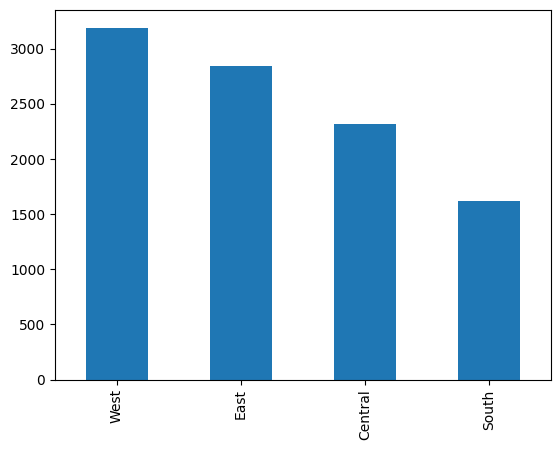

In [14]:
ds['Region'].value_counts().plot.bar()
#Data Visualization

<Axes: ylabel='Category'>

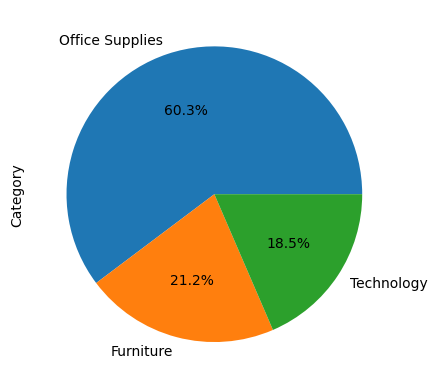

In [15]:
ds.Category.value_counts().plot.pie(autopct="%.1f%%")

<ipython-input-16-5b1231eb6172>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ds.groupby(['Region'])['Sales','Profit'].sum().plot.bar(figsize=(10,5))


Text(0.5, 1.0, 'REGION WISE SALES AND PROFIT')

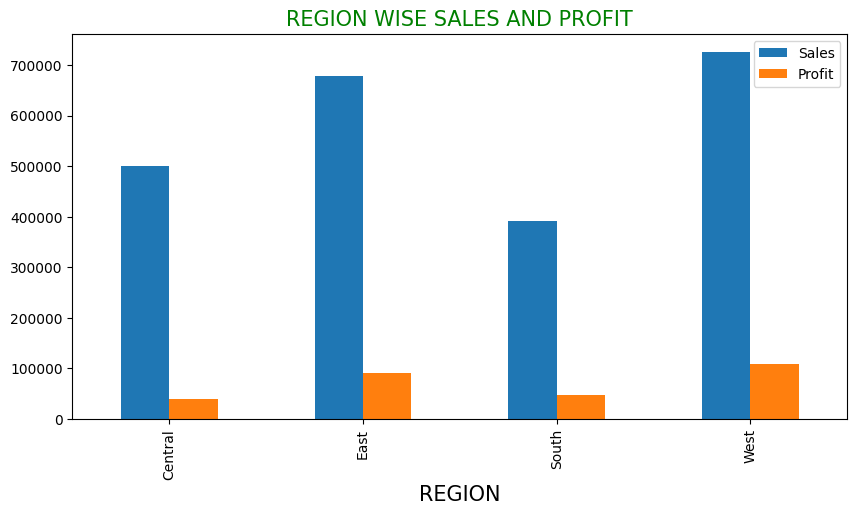

In [16]:
ds.groupby(['Region'])['Sales','Profit'].sum().plot.bar(figsize=(10,5))
plt.xlabel("REGION",fontdict={'color':'black','fontsize':15})
plt.title("REGION WISE SALES AND PROFIT",fontdict={'color':'green','fontsize':15})

So maximum profit in western region.

In [17]:
#filter out warnings
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'SEGMENT WISE SALES AND PROFIT')

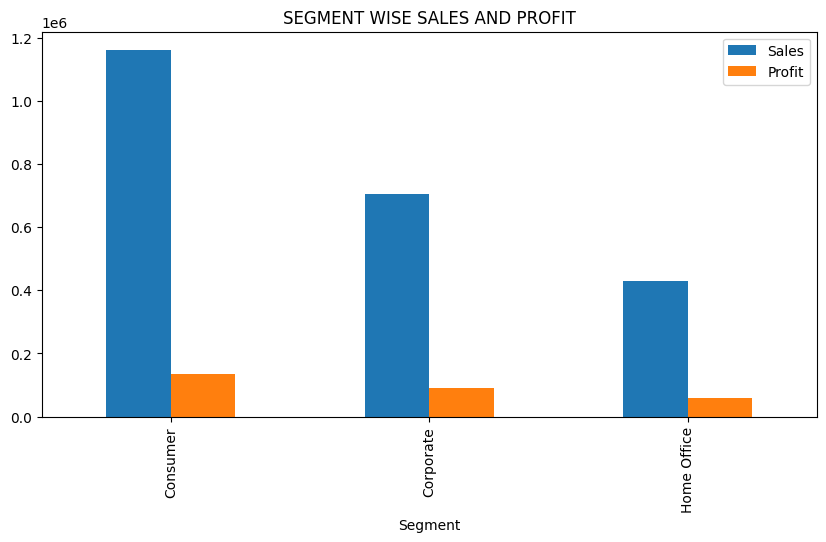

In [18]:
ds.groupby(['Segment'])['Sales','Profit'].sum().plot.bar(figsize=(10,5))
plt.title("SEGMENT WISE SALES AND PROFIT")

Consumer segment has maximum buying capacity and maximum profit to Superstore.

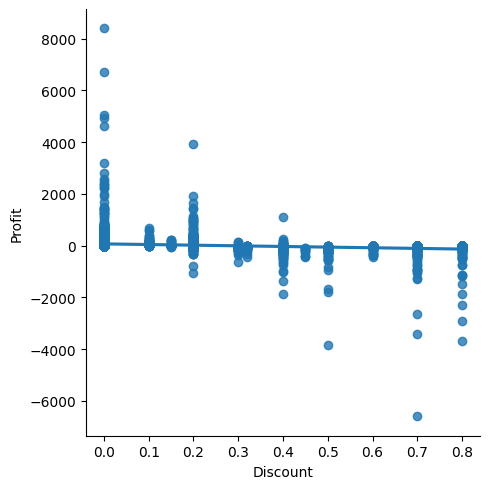

In [19]:
sns.lmplot(x='Discount',y='Profit',data=ds)

From above graph we can see that profit reduces with discount which means they are negatively correlated.

In [20]:
corr=ds.corr()

<Axes: >

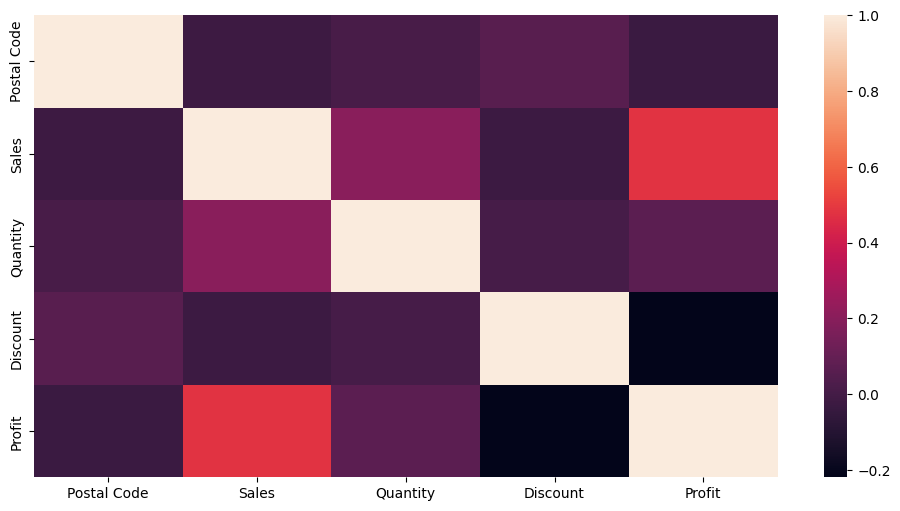

In [21]:
plt.subplots(figsize=(12,6))
sns.heatmap(corr)

Above data tells us that sales and profit are somewhat positively correlated.

Text(0.5, 1.0, ' SALES / SUB-CATEGORY')

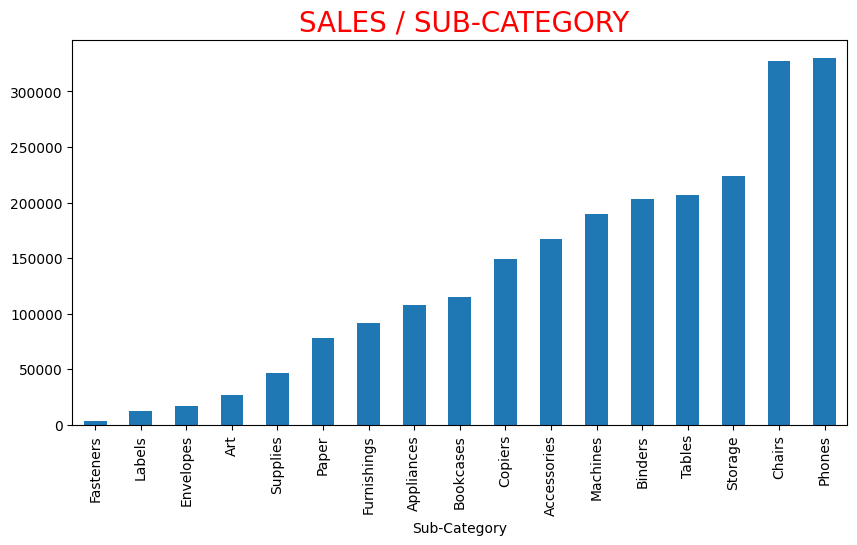

In [22]:
ds.groupby(['Sub-Category'])['Sales'].sum().sort_values().plot.bar(figsize=(10,5))
plt.title(" SALES / SUB-CATEGORY",fontdict={'color':'red','fontsize':20})

From the above graph, we can conclude that phones and chairs are the things that sold most and fastener labels and envelopes are the items that sold least.

<Axes: xlabel='Sub-Category', ylabel='Profit'>

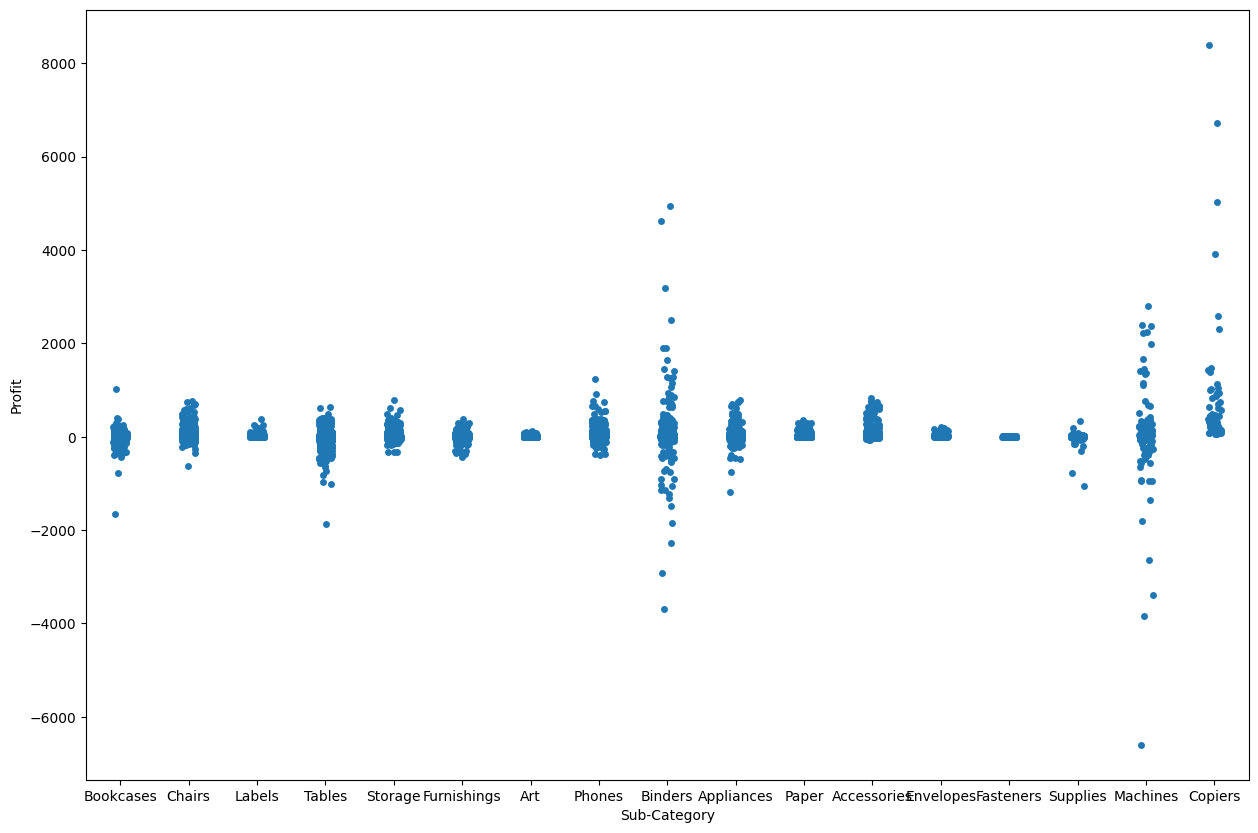

In [23]:
plt.subplots(figsize=(15,10))
sns.stripplot(x=ds['Sub-Category'],y=ds.Profit)

The above data tells us that profit is mostly made in selling copiers while machines mostly incur losses.

<Axes: xlabel='City'>

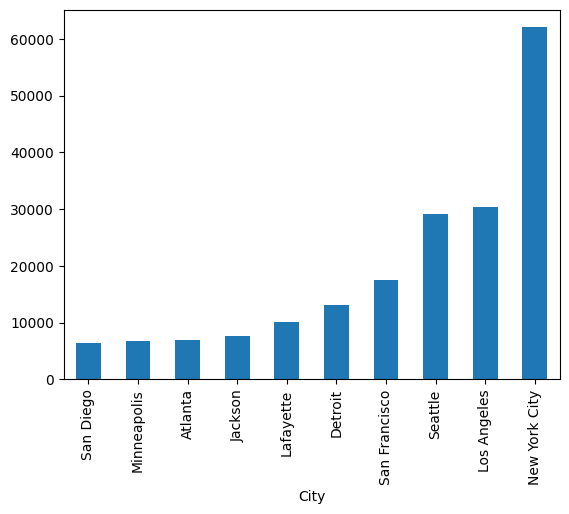

In [24]:
#City wise data analysis.
ds.groupby(ds.City)['Profit'].sum().sort_values().tail(10).plot.bar()

Above Plot tells top 10 cities in terms of yielding profit where New York city gives maximum profit.

<Axes: xlabel='City'>

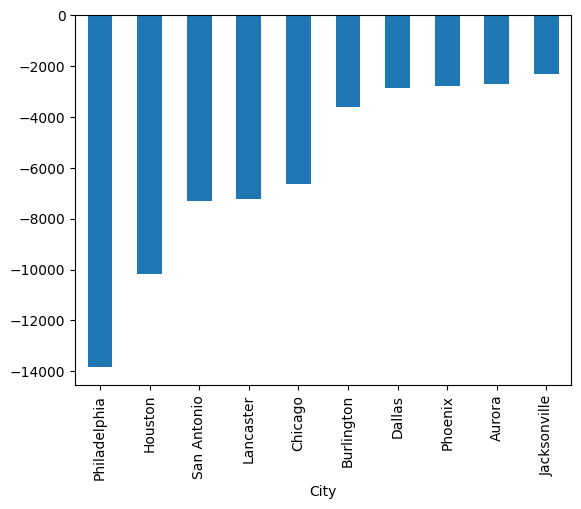

In [25]:
ds.groupby(ds.City)['Profit'].sum().sort_values().head(10).plot.bar()

Above Plot tells top 10 cities in terms of yielding loss where Philadelphia city gives maximum loss.

Now we try to see how we can help the business in cities incurring losses.

In [30]:
cities=['Philadelphia','Housten','San Antonio','Lancaster','Chicago','Burlington','Dallas','Phoenix','Aurora','Jacksonville']
loss_citydat=[]
for x in ds.City:
    if x in cities:
        loss_citydat.append(True)
    else:
        loss_citydat.append(False)
df_losses=ds[loss_citydat]

In [31]:
df_losses=df_losses.sort_values(by='Profit')
pde=df_losses.head(20)

Now 'pde' has data of cities giving maximum losses and the products yielding loss.

In [32]:
pde.groupby('Sub-Category').count()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,,,,,,,
Appliances,1,1,1,1,1,1,1,1,1,1,1,1
Binders,7,7,7,7,7,7,7,7,7,7,7,7
Bookcases,1,1,1,1,1,1,1,1,1,1,1,1
Chairs,1,1,1,1,1,1,1,1,1,1,1,1
Machines,5,5,5,5,5,5,5,5,5,5,5,5
Supplies,1,1,1,1,1,1,1,1,1,1,1,1
Tables,4,4,4,4,4,4,4,4,4,4,4,4


In cities incurring losses, it is Binders and Tables which are sold more so they will incur more loss.

# SUMMARY

1. The West Region saw the most transactions.

2. Maximum sales and profit in the West Region.

3. Maximum sales and profit in the consumer sector.

4. Most items bought were from office supplies.

5. Minimum profit is made in Philipandia where there is maximum discount.

6. Maximum profit is made by selling copies.

7. Phones and chairs have maximum sales.

8. Profit and sales are positively correlated, while discount and profit have a negative correlation

9. New York City is the most profitable city.